# EDA on the ipblocks data

In [13]:
# import modules as necessary
import glob, os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
import pylab
import matplotlib

# set options
pd.options.display.max_colwidth = 50
pd.set_option('display.max_colwidth', -1) 
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# read in csv file
df = pd.read_csv("data.csv") 
# drop column
df = df.drop(df.columns[0],axis=1)
# check dataframe
df.head()

,ipb_id,ipb_user,ipb_address,ipb_create_account,ipb_expiry,date,ipb_reason
0,1623,9418,Wanli2,1,infinity,20040208,"Obvious reincarnation of [[User:Wanli]], banned months ago for using Wikipedia as a personal file-storage area"
1,1624,17254,Xuepiao,1,infinity,20040208,"Reincarnation of [[User:Wanli]], banned months ago for using Wikipedia as a personal file-storage area"
2,1625,6959,GrandVoivodOfErdely,1,infinity,20040208,"Probable reincarnation of banned [[User:Wanli]], and no edits except for using Wikipedia as a personal file-storage area in any case."
3,1706,3107,#1703,1,infinity,20040213,testing
4,2616,43305,Wanli3,1,infinity,20040314,"Reincarnation of [[User:Wanli]], banned months ago for using Wikipedia as a personal file-storage area"


In [3]:
df.shape

(1130485, 7)

In [4]:
# convert object dtype to string ; keep in mind expiry with timestamp will be unusable
df['ipb_address'] = df['ipb_address'].astype('str') #ipaddress -> string
df['ipb_reason'] = df['ipb_reason'].astype('str') 
df['ipb_expiry'] = df['ipb_expiry'].astype('str') #timestamp -> string

In [5]:
# convert date int dtype to datetime format
df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d")
#add year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_year'] = df.date.dt.to_period('M') 
#df.head()

In [6]:
len(df.ipb_user.unique()) # unique users in the table

1023207

In [7]:
#add user type - anonymous / regular
import numpy as np
df['user_type'] = np.where(df['ipb_user']==0, 'anonymous', 'regular')

### Account Blocks over the years

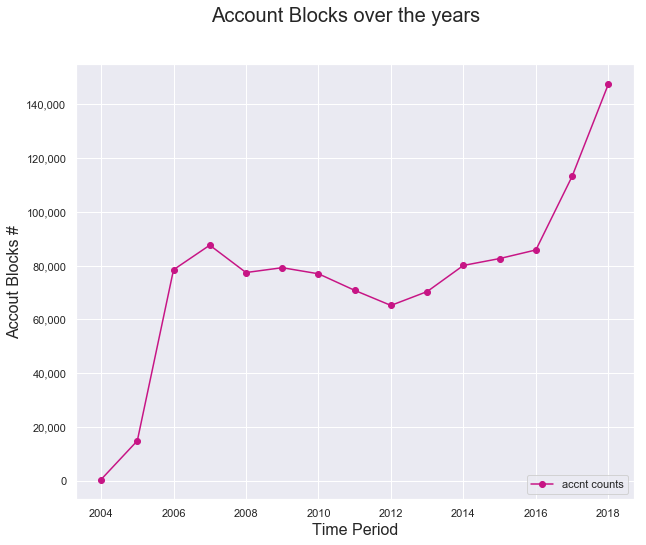

In [21]:
df1 = df.groupby(['year']).size().reset_index(name='accnt counts')
df1 = df1.sort_values(by='year')

sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# plot the trends
plt.plot('year', 'accnt counts', data=df1, marker='o', color='mediumvioletred')

# format plots
fig.suptitle('Account Blocks over the years', fontsize=20)
plt.xlabel('Time Period', fontsize=16)
plt.ylabel('Accout Blocks #', fontsize=16)
pylab.legend(loc='lower right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# display
plt.show()

### User types in account blocks

In [88]:
#Regular vs Anonymous User Share over the years
df2 = df.groupby(['user_type']).size().reset_index(name='counts')
df2
# 9.4% anon
#91% registered

,user_type,counts
0,anonymous,107279
1,regular,1023206


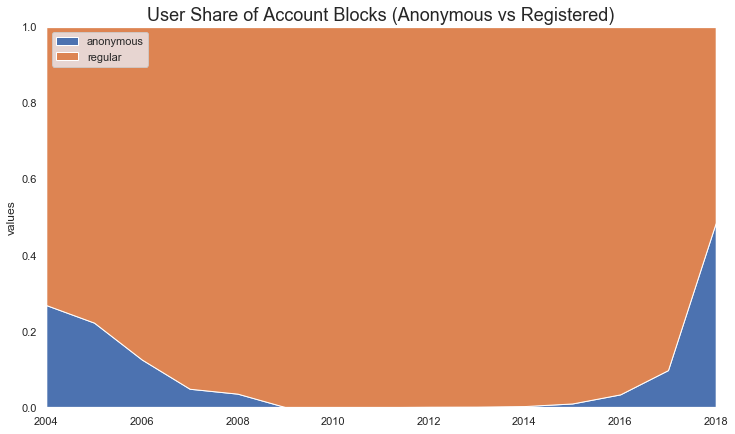

In [23]:
#Regular vs Anonymous User Share over the years
df2 = df.groupby(['year','user_type']).size().reset_index(name='counts')
df2 = df2.pivot(index ='year',columns = 'user_type' ,values ='counts')
df2 = df2.sort_values(by='year')
# We need to transform the data from raw data to percentage (fraction)
data_perc = df2.divide(df2.sum(axis=1), axis=0)
 
# Make the plot
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
plt.stackplot(df2.index,  data_perc["anonymous"],  data_perc["regular"], labels=['anonymous','regular'])
plt.title("User Share of Account Blocks (Anonymous vs Registered)",fontsize = 18)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.ylabel('values')
plt.show()

### The same trends isolated to 2018

In [87]:
df3 = df[df['year']==2018]
df3 = df3.groupby(['month_year','user_type']).size().reset_index(name='counts')
df3 = df3.sort_values(by='month_year')[:-2]
df3['period'] = df3['month_year'].apply(lambda x: x.strftime('%b-%Y'))
df3

df3.to_csv('C:/Users/CHARU/Desktop/df3.csv')

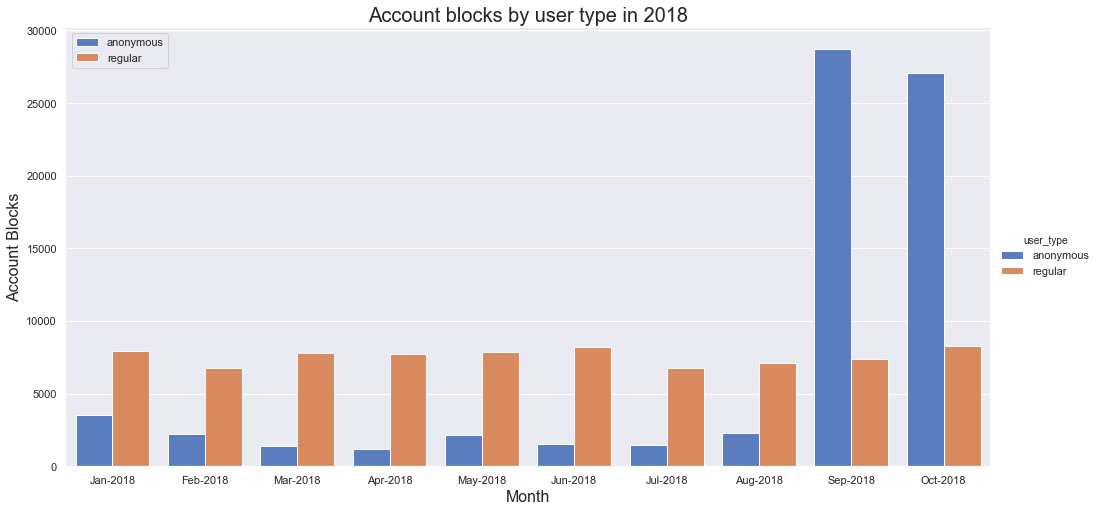

NameError: name 'savefig' is not defined

In [110]:
df3 = df[df['year']==2018]
df3 = df3.groupby(['month_year','user_type']).size().reset_index(name='counts')
df3 = df3.sort_values(by='month_year')[:-2]
df3['period'] = df3['month_year'].apply(lambda x: x.strftime('%b-%Y'))


sns.set(style="darkgrid")
plot = sns.catplot(x="period", y="counts", hue="user_type", data=df3 , height=7, aspect=2,kind="bar", palette="muted")
plot.despine(left=True)
plot.set_ylabels("Account Blocks", fontsize=16)
plot.set_xlabels("Month", fontsize=16)
plt.legend(loc='upper left')
plt.title ("Account blocks by user type in 2018",fontsize = 20)
# display
plt.show()
savefig('foo.png')

### Extracting key harassment types from reasons text

In [56]:
df_text[df_text["dummy"].str.contains("Hosting Range", na=False)]

,ipb_id,ipb_user,ipb_address,ipb_create_account,ipb_expiry,date,ipb_reason,year,month,month_year,user_type,dummy
13607,67385,680417,Rx Strangelove,1,infinity,2005-12-13,impostor of rx strangelove,2005,12,2005-12,regular,Hosting Range
14500,72155,716058,Doc glasgow returns!,1,infinity,2005-12-22,strange.... imposter,2005,12,2005-12,regular,Hosting Range
19591,92596,880098,Homeontheranger,1,infinity,2006-02-04,too similar to existing user homeontherange,2006,2,2006-02,regular,Hosting Range
24216,108046,0,209.247.158.0/24,1,infinity,2006-02-27,"ip range registered to yahoo used for web hosting, contains at least two open proxies",2006,2,2006-02,anonymous,Hosting Range
37674,154582,1357026,Laranja~enwiki,1,infinity,2006-05-03,orange on wheels,2006,5,2006-05,regular,Hosting Range
37679,154594,1371535,Orangefacematt,1,infinity,2006-05-03,orange on wheels,2006,5,2006-05,regular,Hosting Range
59802,231022,2032569,BoBot,1,infinity,2006-08-18,strange behaviour,2006,8,2006-08,regular,Hosting Range
77176,286244,2572097,ShazzaFormby,1,infinity,2006-10-25,duplicating user pages in article space for some very strange reason,2006,10,2006-10,regular,Hosting Range
108434,405596,2323338,Weird Wetland,1,infinity,2007-02-23,strange troll,2007,2,2007-02,regular,Hosting Range
110915,415094,3716163,MurrMan5,1,infinity,2007-03-03,strange line of users with similar name,2007,3,2007-03,regular,Hosting Range


In [58]:
# in another dataframe called df_text
df_text = df.copy()
df_text["ipb_reason"] = df_text["ipb_reason"].str.lower()
df_text["dummy"] = "random"
conditions = [(df_text["ipb_reason"].str.contains("vandal", na=False)),
              (df_text["ipb_reason"].str.contains("proxy", na=False)), 
              (df_text["ipb_reason"].str.contains("spam", na=False)),
              (df_text["ipb_reason"].str.contains("soft", na=False)),
              (df_text["ipb_reason"].str.contains("checkuser", na=False)),
              (df_text["ipb_reason"].str.contains("school", na=False)),
              (df_text["ipb_reason"].str.contains("contribute", na=False)),
              (df_text["ipb_reason"].str.contains("webhost|advertising", na=False)),
              (df_text["ipb_reason"].str.contains("hard", na=False)),
              (df_text["ipb_reason"].str.contains("anonbl", na=False)),
              (df_text["ipb_reason"].str.contains("sock|bot", na=False)),
              (df_text["ipb_reason"].str.contains("copyright", na=False)),
              (df_text["ipb_reason"].str.contains("evasion", na=False)),
              (df_text["ipb_reason"].str.contains("username", na=False)),
              (df_text["ipb_reason"].str.contains("impersonat", na=False)),
              (df_text["ipb_reason"].str.contains("disruptive", na=False)),
              (df_text["ipb_reason"].str.contains("rangebl", na=False)),
              (df_text["ipb_reason"].str.contains("long-term", na=False)),
              (df_text["ipb_reason"].str.contains("harassment|troll|personal|offensive", na=False)),
              ((df_text["ipb_reason"].isnull()))]
choices = ["Vandalism","Proxy","Spam","Username or Soft Block","Multiple Accounts","School Block",
           "No Intention to Contribute","Webhost",
           "IP or Hard Block","Anonymous Contribution","Sock Puppettry","Copyright","Evasion",
           "Username Violation","Impersonation",
           "Disruptive","Hosting Range","Long-term Abuse","Harassment","Not Available"]
df_text["dummy"] = np.select(conditions,choices)
df_text["dummy"].replace("0","Not Available",inplace = True)
#df_text.head(10)

In [59]:
# types of harassment and their counts
df_text["dummy"].value_counts()

Vandalism                     243133
Spam                          204627
Sock Puppettry                146067
Not Available                 126375
Username Violation            84548 
Username or Soft Block        75851 
Proxy                         73525 
Multiple Accounts             63213 
IP or Hard Block              31568 
No Intention to Contribute    16218 
School Block                  16016 
Evasion                       13686 
Harassment                    10139 
Disruptive                    9078  
Webhost                       6379  
Long-term Abuse               4188  
Anonymous Contribution        2284  
Copyright                     2147  
Impersonation                 1386  
Hosting Range                 57    
Name: dummy, dtype: int64

### Reasons most frequent for blocking

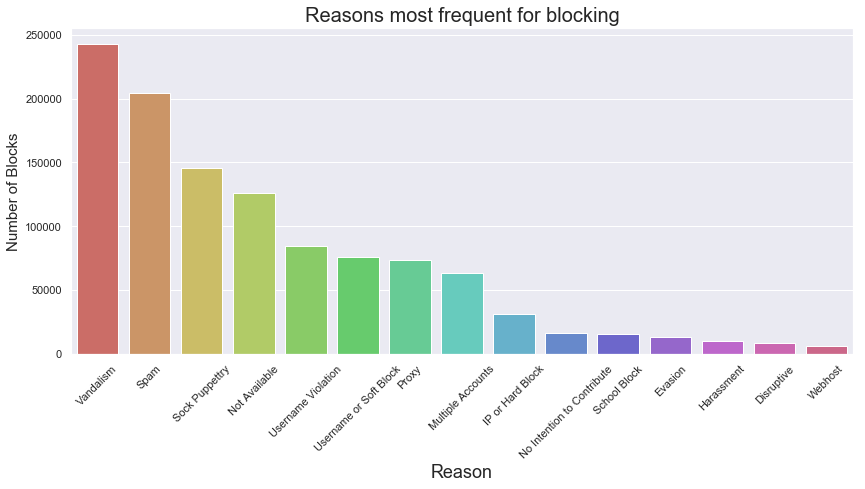

In [60]:
df4 = df_text.groupby(['dummy']).size().reset_index(name='counts')
df4 = df4.sort_values(by='counts',ascending = False)
df4 = df4.head(15)

sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
sns.barplot(x= 'dummy', y = 'counts',data = df4, palette="hls")
plt.title("Reasons most frequent for blocking", fontsize=20) # seting the title size
plt.xlabel("Reason", fontsize=18) # seting the x label size
plt.ylabel("Number of Blocks", fontsize=15) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show() #use plt.show to render the graph that we did above

### How that share has been changing over time

In [83]:
df5 = df_text.groupby(['year','dummy']).size().reset_index(name='counts')
df5 = df5.pivot(index ='year',columns ='dummy',values ='counts')
df5 = df5.sort_values(by='year')

# We need to transform the data from raw data to percentage (fraction)
data_perc = df5.divide(df5.sum(axis=1), axis=0)
data_perc = data_perc.fillna(0)
data_perc

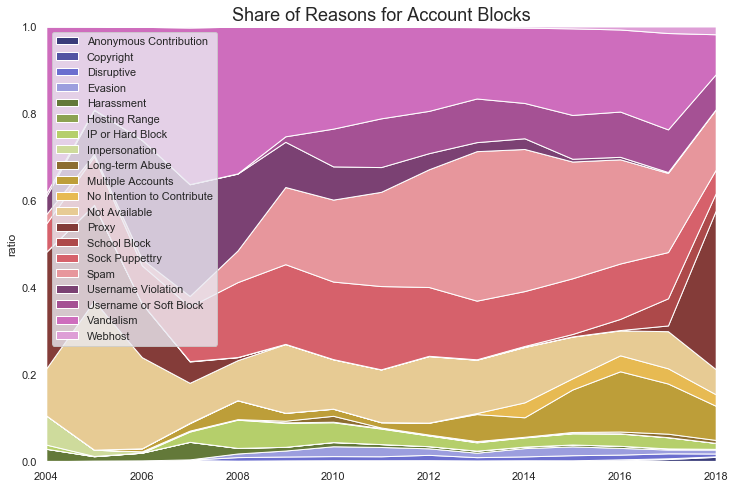

In [68]:
# Make the plot
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
#pal  = sns.color_palette("Set3", 21)
#pal = sns.hls_palette(22, s=.5)
colors1 = plt.cm.tab20b.colors
plt.stackplot(df5.index,data_perc['Anonymous Contribution'],data_perc['Copyright'],data_perc['Disruptive'],
              data_perc['Evasion'],data_perc['Harassment'],data_perc['Hosting Range'],
              data_perc['IP or Hard Block'],data_perc['Impersonation'],data_perc['Long-term Abuse'],
              data_perc['Multiple Accounts'],data_perc['No Intention to Contribute'],data_perc['Not Available'],
              data_perc['Proxy'],data_perc['School Block'],data_perc['Sock Puppettry'],
              data_perc['Spam'],data_perc['Username Violation'],data_perc['Username or Soft Block'],data_perc['Vandalism'],
              data_perc['Webhost'],
              labels = ['Anonymous Contribution', 'Copyright', 'Disruptive', 'Evasion',
       'Harassment', 'Hosting Range', 'IP or Hard Block', 'Impersonation',
       'Long-term Abuse', 'Multiple Accounts', 'No Intention to Contribute',
       'Not Available', 'Proxy', 'School Block', 'Sock Puppettry', 'Spam',
       'Username Violation', 'Username or Soft Block', 'Vandalism', 'Webhost']
             ,colors = colors1)
plt.title("Share of Reasons for Account Blocks",fontsize = 18)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.ylabel('ratio')
plt.show()

### Same trend isolated for 2018

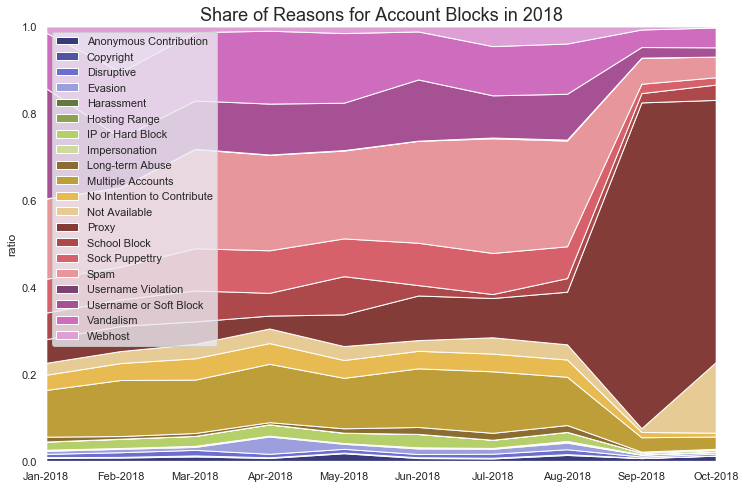

In [69]:
# share of reasons for 2018
df_text2018 = df_text[df_text["year"]== 2018]
df6 = df_text2018.groupby(['month_year','dummy']).size().reset_index(name='counts')
df6 = df6.pivot(index ='month_year',columns ='dummy',values ='counts')
df6 = df6.sort_values(by='month_year')
df6['month_year'] = df6.index
df6['month'] = df6['month_year'].apply(lambda x: x.strftime('%b-%Y')) 
df6 = df6[:-1]
df6.index = df6['month']
df6 = df6.drop(df6.columns[-2],axis=1)
df6 = df6.drop(df6.columns[-1],axis=1)

# We need to transform the data from raw data to percentage (fraction)
data_perc = df6.divide(df6.sum(axis=1), axis=0)
data_perc = data_perc.fillna(0)

# Make the plot
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
colors1 = plt.cm.tab20b.colors
plt.stackplot(df6.index,data_perc['Anonymous Contribution'],data_perc['Copyright'],data_perc['Disruptive'],
              data_perc['Evasion'],data_perc['Harassment'],data_perc['Hosting Range'],
              data_perc['IP or Hard Block'],data_perc['Impersonation'],data_perc['Long-term Abuse'],
              data_perc['Multiple Accounts'],data_perc['No Intention to Contribute'],data_perc['Not Available'],
              data_perc['Proxy'],data_perc['School Block'],data_perc['Sock Puppettry'],
              data_perc['Spam'],data_perc['Username Violation'],data_perc['Username or Soft Block'],data_perc['Vandalism'],
              data_perc['Webhost'],
              labels = ['Anonymous Contribution', 'Copyright', 'Disruptive', 'Evasion',
       'Harassment', 'Hosting Range', 'IP or Hard Block', 'Impersonation',
       'Long-term Abuse', 'Multiple Accounts', 'No Intention to Contribute',
       'Not Available', 'Proxy', 'School Block', 'Sock Puppettry', 'Spam',
       'Username Violation', 'Username or Soft Block', 'Vandalism', 'Webhost']
             ,colors = colors1)
plt.title("Share of Reasons for Account Blocks in 2018",fontsize = 18)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.ylabel('ratio')
plt.show()

### What are regular users most blocked for vs anonymous

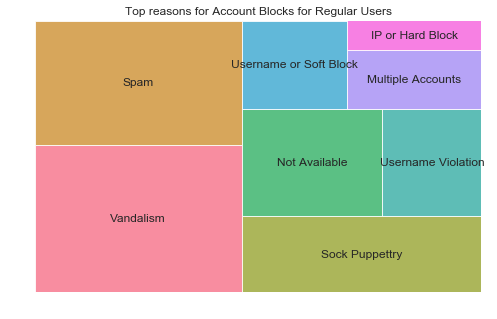

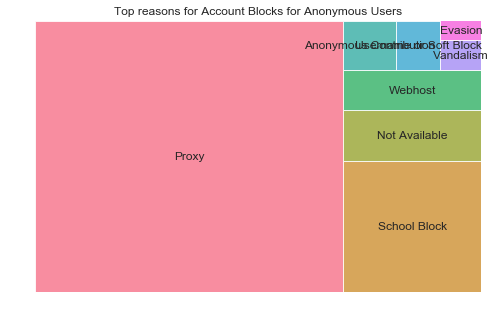

In [89]:
# what are regular users blocked for 
df_text_regular = df_text[df_text['user_type']=='regular']
df6 = df_text_regular.groupby(['user_type','dummy']).size().reset_index(name='counts')
df6 = df6.sort_values(by='counts',ascending = False)
df6 = df6[0:8]

sns.set(style="darkgrid")
pal  = sns.color_palette("husl", 8)
plt.figure(figsize=(8,5))
squarify.plot(sizes=df6['counts'], label=df6['dummy'], color = pal,alpha=.8 )
plt.axis('off')
plt.title("Top reasons for Account Blocks for Regular Users",fontsize=12) 
plt.show()

# what are anonymous users blocked for
df_text_regular = df_text[df_text['user_type']=='anonymous']
df7 = df_text_regular.groupby(['user_type','dummy']).size().reset_index(name='counts')
df7 = df7.sort_values(by='counts',ascending = False)
df7 = df7[0:8]

sns.set(style="darkgrid")
pal  = sns.color_palette("husl", 8)
plt.figure(figsize=(8,5))
squarify.plot(sizes=df7['counts'], label=df7['dummy'],color = pal, alpha=.8 )
plt.axis('off')
plt.title("Top reasons for Account Blocks for Anonymous Users", fontsize=12) # seting the title size
plt.show()



### Who are accounts getting blocked by

In [90]:
df_add = pd.read_csv("ipblocks_by.csv") 

In [91]:
df_add.columns = ["ipb_id","ipb_by","ipb_by_text","ipb_exp"]
df_merge = pd.merge(df_text,df_add,how="inner", on="ipb_id")

#### Top Blockers over entire history

In [92]:
#df_merge["ipb_exp"].replace({"infinity":21000000}, inplace=True)
#df_merge["bl_year"] = np.around(df_merge["date"]/10000, decimals = 0)
#df_merge["bl_mon"] = np.around(df_merge["date"]/10000, decimals = 0)*10000
#df_merge["bl_mon"] = np.around((df_merge["date"]-df_merge["bl_mon"])/100, decimals = 0)
#df_merge["bl_yr_mn"] = df_merge["bl_year"].astype(str).str.cat(df_merge["bl_mon"].astype(str), sep='/')
#df_merge["ubl_year"] = df_merge["ipb_exp"].str[0:4]
#df_merge.tail()
df_by = df_merge.groupby(['ipb_by', 'ipb_by_text']).size().reset_index(name='Freq')
bl_tot = df_by["Freq"].sum()
df_by.sort_values("Freq", inplace=True, ascending=False)
df_by["Prop"] = np.around(((df_by["Freq"]/bl_tot)*100),decimals=2)
df_by.head(10)

,ipb_by,ipb_by_text,Freq,Prop
1730,7852030,Materialscientist,56465,5.07
1750,8760229,ProcseeBot,41440,3.72
291,55327,Alexf,35683,3.21
804,301395,NawlinWiki,26982,2.42
1802,13975403,Widr,24087,2.16
988,491706,Edgar181,24037,2.16
1720,7583140,Bbb23,22964,2.06
1251,1257855,Gogo Dodo,21416,1.92
1518,3174456,Oshwah,18230,1.64
243,42464,Orangemike,16801,1.51


#### Top Blockers in 2018

In [98]:
df_by = df_merge.groupby(['ipb_by', 'ipb_by_text','year']).size().reset_index(name='Freq')
df_by = df_by.loc[df_by["year"]==2018]
bl_tot = df_by["Freq"].sum()
df_by.sort_values("Freq", inplace=True, ascending=False)
df_by["Prop"] = np.around(((df_by["Freq"]/bl_tot)*100),decimals=2)
df_res = df_by.head(5)
val = 100-df_res["Prop"].sum()
freq = bl_tot-df_res["Freq"].sum()
df_res.loc[6] = ["000000","All other users","2018",freq,val]
df_res2 = df_res.head(6)

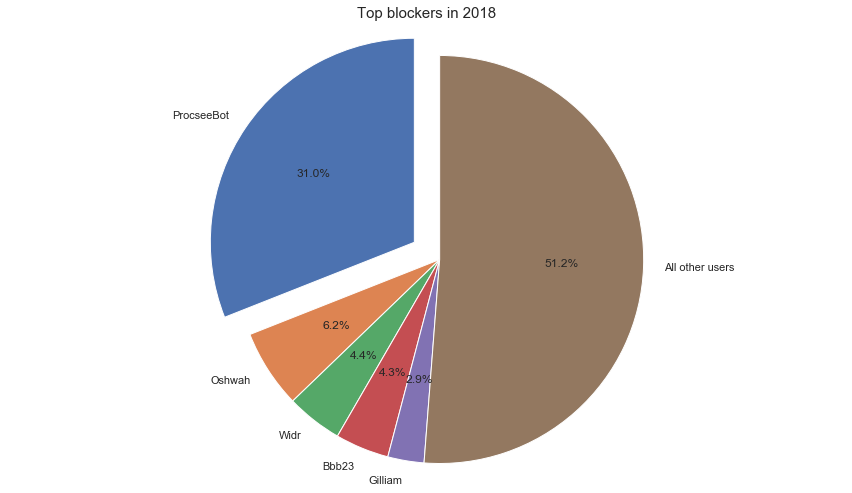

In [94]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,7)

plt.pie(
    # using data total)arrests
    'Prop',
    # with the labels being officer names
     labels='ipb_by_text',
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    data = df_res
    )

# View the plot drop above
plt.axis('equal')
plt.title("Top blockers in 2018",fontsize=15) 

# View the plot
plt.tight_layout()
plt.show()

#### Top Blockers in 2017

In [ ]:
df_by = df_merge.groupby(['ipb_by', 'ipb_by_text','year']).size().reset_index(name='Freq')
df_by = df_by.loc[df_by["year"]==2017]
bl_tot = df_by["Freq"].sum()
df_by.sort_values("Freq", inplace=True, ascending=False)
df_by["Prop"] = np.around(((df_by["Freq"]/bl_tot)*100),decimals=2)
df_res = df_by.head(5)
val = 100-df_res["Prop"].sum()
freq = bl_tot-df_res["Freq"].sum()
df_res.loc[6] = ["000000","All other users","2017",freq,val]
#df_res.head(6)

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,7)

plt.pie(
    # using data total)arrests
    'Prop',
    # with the labels being officer names
     labels='ipb_by_text',
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    data = df_res
    )

# View the plot drop above
plt.axis('equal')
plt.title("Top blockers in 2017",fontsize=15) 

# View the plot
plt.tight_layout()
plt.show()

### Let's take a look at blocker "ProcseeBot"

#### Blocks done by ProcseeBot year-wise

In [99]:
df_by = df_merge.groupby(['ipb_by', 'ipb_by_text','year','user_type']).size().reset_index(name='counts')
df_by = df_by.loc[df_by["ipb_by_text"]=="ProcseeBot"]
df_by

,ipb_by,ipb_by_text,year,user_type,counts
8727,8760229,ProcseeBot,2016,anonymous,5
8728,8760229,ProcseeBot,2017,anonymous,771
8729,8760229,ProcseeBot,2018,anonymous,40664


#### Blocks done by ProcseeBot month-wise

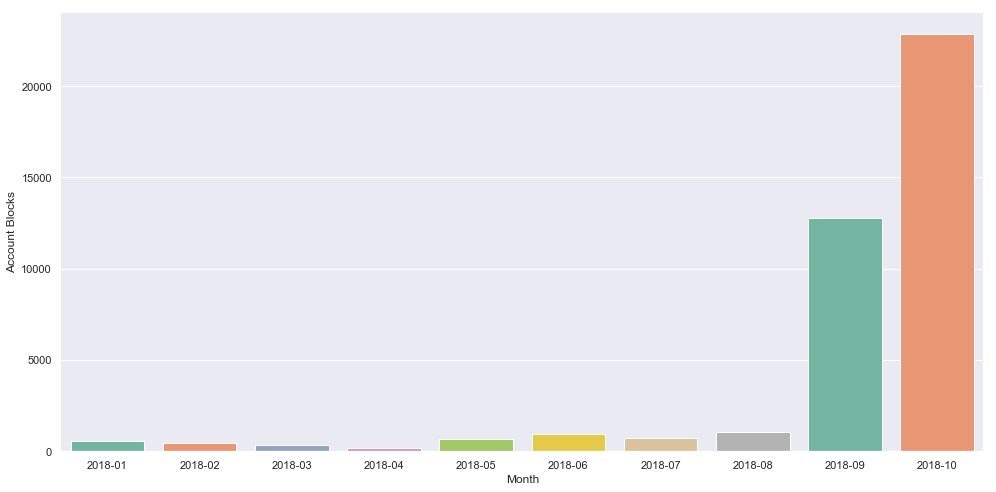

In [105]:
df_merge2 = df_merge.loc[df_merge["year"]==2018]
df_by = df_merge2.groupby(['ipb_by', 'ipb_by_text','month_year']).size().reset_index(name='Freq')
df_by = df_by.loc[df_by["ipb_by_text"]=="ProcseeBot"]
df_by

sns.set(style="darkgrid")
plot = sns.catplot(x="month_year", y="Freq", data=df_by , height=7, aspect=2,kind="bar", palette="Set2")
plot.despine(left=True)
plot.set_ylabels("Account Blocks")
plot.set_xlabels("Month")

#### Reasons given by ProcseeBot for blocking users

In [101]:
df_by = df_merge.groupby(['ipb_by', 'ipb_by_text','dummy']).size().reset_index(name='counts')
df_by = df_by.loc[df_by["ipb_by_text"]=="ProcseeBot"]
df_by

,ipb_by,ipb_by_text,dummy,counts
12248,8760229,ProcseeBot,Not Available,1947
12249,8760229,ProcseeBot,Proxy,39493


Takeaways -
- Increase in blocks in 2017 and 2018
- Increase in blocks in 2018 primarily in Sep and Oct 2018
- The blocks are only pertaining to Anonymous users
- The blocks reason - Proxy and almost most of those blocks are being by 1 blocker called 'ProcseeBot'
- Has Wikipedia come up with a new or better merchanism to identify proxies and block them? Or is this only a function of the current climate (political/social etc)
